# Cumulative and individual impacts of the human footprint on similarity

to reference high ecological integrity reference states.

Evan Muise [](https://orcid.org/0000-0003-3404-3220) (Department of Forest Resource Management, University of British Columbia, Vancouver, British Columbia, Canada)  
Nicholas Coops [](https://orcid.org/0000-0002-7859-8394) (Department of Forest Resource Management, University of British Columbia, Vancouver, British Columbia, Canada)  
Txomin Hermosilla [](https://orcid.org/0000-0002-5445-0360) (Canadian Forest Service (Pacific Forestry Centre), Natural Resources Canada, Victoria, British Columbia, Canada)  
Chris Mulverhill [](https://orcid.org/0000-0002-2422-7432) (Department of Forest Resource Management, University of British Columbia, Vancouver, British Columbia, Canada)  
Cole Burton [](https://orcid.org/0000-0002-8799-3847) (Department of Forest Resource Management, University of British Columbia, Vancouver, British Columbia, Canada)  
Stephen Ban [](https://orcid.org/0000-0001-5033-3370) (BC Parks, Government of British Columbia, Victoria, British Columbia, Canada)  
October 15, 2024

ABSTRACT

In [ ]:
# package citation
.to.cite <- c("sgsR",  "terra", "sf", "rstatix")

pkgs <- unique(c(.to.cite, .packages()))
knitr::write_bib(pkgs, file = "packages.bib")

# Introduction

A global biodiversity crisis is currently underway, driven by anthropogenic changes \[@dirzo2003\]. Pressures such as climate change, land use change, and invasive species, are leading to species extinctions \[@thomas2004; @urban2015\] and the homogenization of biological communities \[@mcgill2015\]. The Kunming-Montreal Global Biodiversity Framework (GBF) was adopted in December 2022 with the goal of restoring and safeguarding global biodiversity \[@reporto2023\]. Targets within this framework include restoring 30% of all degraded ecosystems, protecting 30% of the Earth’s terrestrial, inland water, and marine areas, and achieving no loss of high biodiversity importance areas, including high ecological integrity ecosystems \[@reporto2023\]. In the terrestrial environment, forest biomes have been shown to harbour the largest amount of biodiversity \[@myers1988; @pimm2000; @cardinale2012\], and provide key ecosystem services \[@thompson2009\]. To provide these services, it is integral that these forest ecosystems are in good ecological condition, as represented by natural or near-natural levels of forest structure, function, and composition, often referred to as having high ecological integrity \[@marín2021\].

While understanding forest condition is a key aspect of understanding biodiversity and the provision of ecosystem services due to their inherent linkages \[@marín2021; @cardinale2012\], it is challenging to obtain suitable field-derived data across extensive land areas due to the significant financial and temporal costs associated with large-scale field campaigns. Remote sensing data, however, can provide a efficient and cost-effective alternative to field data, offering access to new spatially explicit and comprehensive datasets that can be linked to ecological condition, with additional metrics being proposed at a rapid pace \[@skidmore2021; @pereira2013; @radeloff2024\]. Advances in lidar technologies and modelling methods are enabling the generation of wall-to-wall estimates of forest stand structure to be generated across entire countries \[@matasci2018; @becker2023; @matasci2018a\], which serve as a more detailed indicator of ecosystem structure than the often previously used landscape fragmentation metrics \[@andrew2012\]. Productivity metrics have been employed as a proxy for ecosystem function for many years \[@pettorelli2005; @pettorelli2018\], with new Landsat-derived datasets providing integrative annual estimates of energy availability at a 30 m spatial resolution \[@radeloff2024; @radeloff2019; @razenkova\]. Remote sensing is quickly providing access to a vast array of datasets suitable for monitoring the various facets of biodiversity and ecological condition \[@noss1990\]. The integration of these datasets with information pertaining to the location of known high-ecological-integrity forests enables researchers to identify high-quality forest reference states across entire jurisdictions, even in the presence of anthropogenic pressures.

Ecological reference states represent baseline conditions of ecosystems, serving as a benchmark for assessing ecological health and guiding restoration efforts \[@nielsen2007\]. The application of counterfactual thinking, which entails considering the potenital state of an ecosystem in the absence of anthropogenic pressures \[@ferraro2009\] can be instrumental for mapping high-integrity forests. Approaches such as coarsened exact matching \[@iacus2012\], can be used to facilitate comparisons between forest stands and their hypothetical reference states. These methods account for confounding environmental variables, thereby ensuring that all forests are compared to an appropriate reference state. Identifying a suitable reference state can be difficult, however there are methods which can be used to approximate high-integrity reference conditions. Historical reference states can be used when an ecosystem has a large depth of temporal data to compare to, however, it is not always guaranteed that an ecosystem can be restored to these historical norms due to changing climates \[@balaguer2014; @mcnellie2020\]. Other proposed methods for delineating baseline conditions include protected areas \[@arcese1997\], and empirical estimates of the reference state generated by modelling outcomes (oftentimes species abundances and occurrence) in the absence of anthropogenic disturbance \[@nielsen2007\].

Protected areas, specifically designed for biodiversity conservation, are frequently faced with lower levels anthropogenic pressure as a result of biases in their placement \[@joppa2009; @muise2022\]. In forested ecosystems, over time this leads to undisturbed high-integrity forests remaining within protected areas due to their natural disturbance regimes and a lack of anthropogenic pressures \[@brumelis2011\]. These high-integrity forests, situated within protected areas, can serve as effective ecological baselines \[@arcese1997\]. When suitably matched to unprotected areas, they can be used as a reference state to assess the differences between all forests and their high-integrity counterparts \[@ferraro2009\]. Further, protected areas and undisturbed ecosystems such as intact forest landscapes have been shown to have increased structural densities when compared to other ecosystems \[@li2023; @muise2022\].

Anthropogenic pressure such as increased road densities \[@nielsen2007\], harvesting leading to edge effects \[@bourgoin2024\], and other human-induced disturbances \[@liira2007\] have been shown to influence forest structure. Novel datasets such as the Forest Structural Condition Index (FSCA) have been developed which integrate both structure and anthropogenic pressure into an index which identifies ecosystems of high conservation value, with high structural complexity and low anthropogenic pressure \[@hansen2019\]. The impacts of anthropocentric pressure on forest functioning and energy availability is less frequently assessed. @hedwall2019 assessed plant community shifts under anthropogenic pressures in the boreal forests of Sweden, and hypothesized that changed communities may affect forest functioning. @grantham2020 used forest extent and arrangement, alongside pressure datasets, to assess ecosystem integrity, with expectations that high-integrity ecosystems will retain high levels of ecosystem functioning. However, to our knowledge, direct impacts of anthropogenic pressures on forest ecosystem function have not been assessed at a landscape scale.

We proposed a novel, data-driven, approach to identify high-integrity forests based on various satellite-derived metrics of ecosystem condition, and calculate the degree of similarity for regions of unknown integrity to high-integrity forests found on Vancouver Island, British Columbia, Canada. We use a strict matching approach to ensure ecological similarity, and choose the highest 10% of metric values across variables that are known to be correlated with ecological condition and biodiversity. We then calculate ecological similarity using sigma dissimilarity \[@mahony2017\] alongside human footprint layers developed by @hirsh-pearson2022 to assess the influence of anthropogenic pressure of ecological integrity by cumulative and individual pressures. Further, we compare the similarity metrics between ecological structure and function to identify linkages between ecological similartiy of forest structure and forest functioning, while accounting for the presence of anthropogenic pressures.

# Methods

## Study Area

We focus on the forested areas of Vancouver Island, British Columbia, Canada. Vancouver island has approximately 31285 km<sup>2</sup> of land area, of which 79.5% is forested. The dominant forest species on Vancouver Island are Douglas-fir (*Pseudotsuga menziesii*), western red cedar (*Thuja plicata*), western hemlock (*Tsuga heterophylla*), yellow cedar (*Chamaecyparis nootkatensis*), and Sitka spruce (*Picea sitchensis*) \[@burns1990\]. British Columbia generally has at temperate maritime climate, with mild, wet winters, and cool, dry summers. There are four ecosystems on Vancouver Island as defined by British Columbia’s biogeoclimatic ecosystem classification (BEC) framework \[@pojar1987\], Coastal Western Hemlock (CWH), Mountain Hemlock (MH), Coastal Douglas Fir (CDF), and Coastal Mountain-heather Alpine (CMA), which are broadly delineated based on soil, climate, and elevation. Forestry is an important industry on Vancouver Island, while fires are historically rare and low severity \[@daniels2006\].

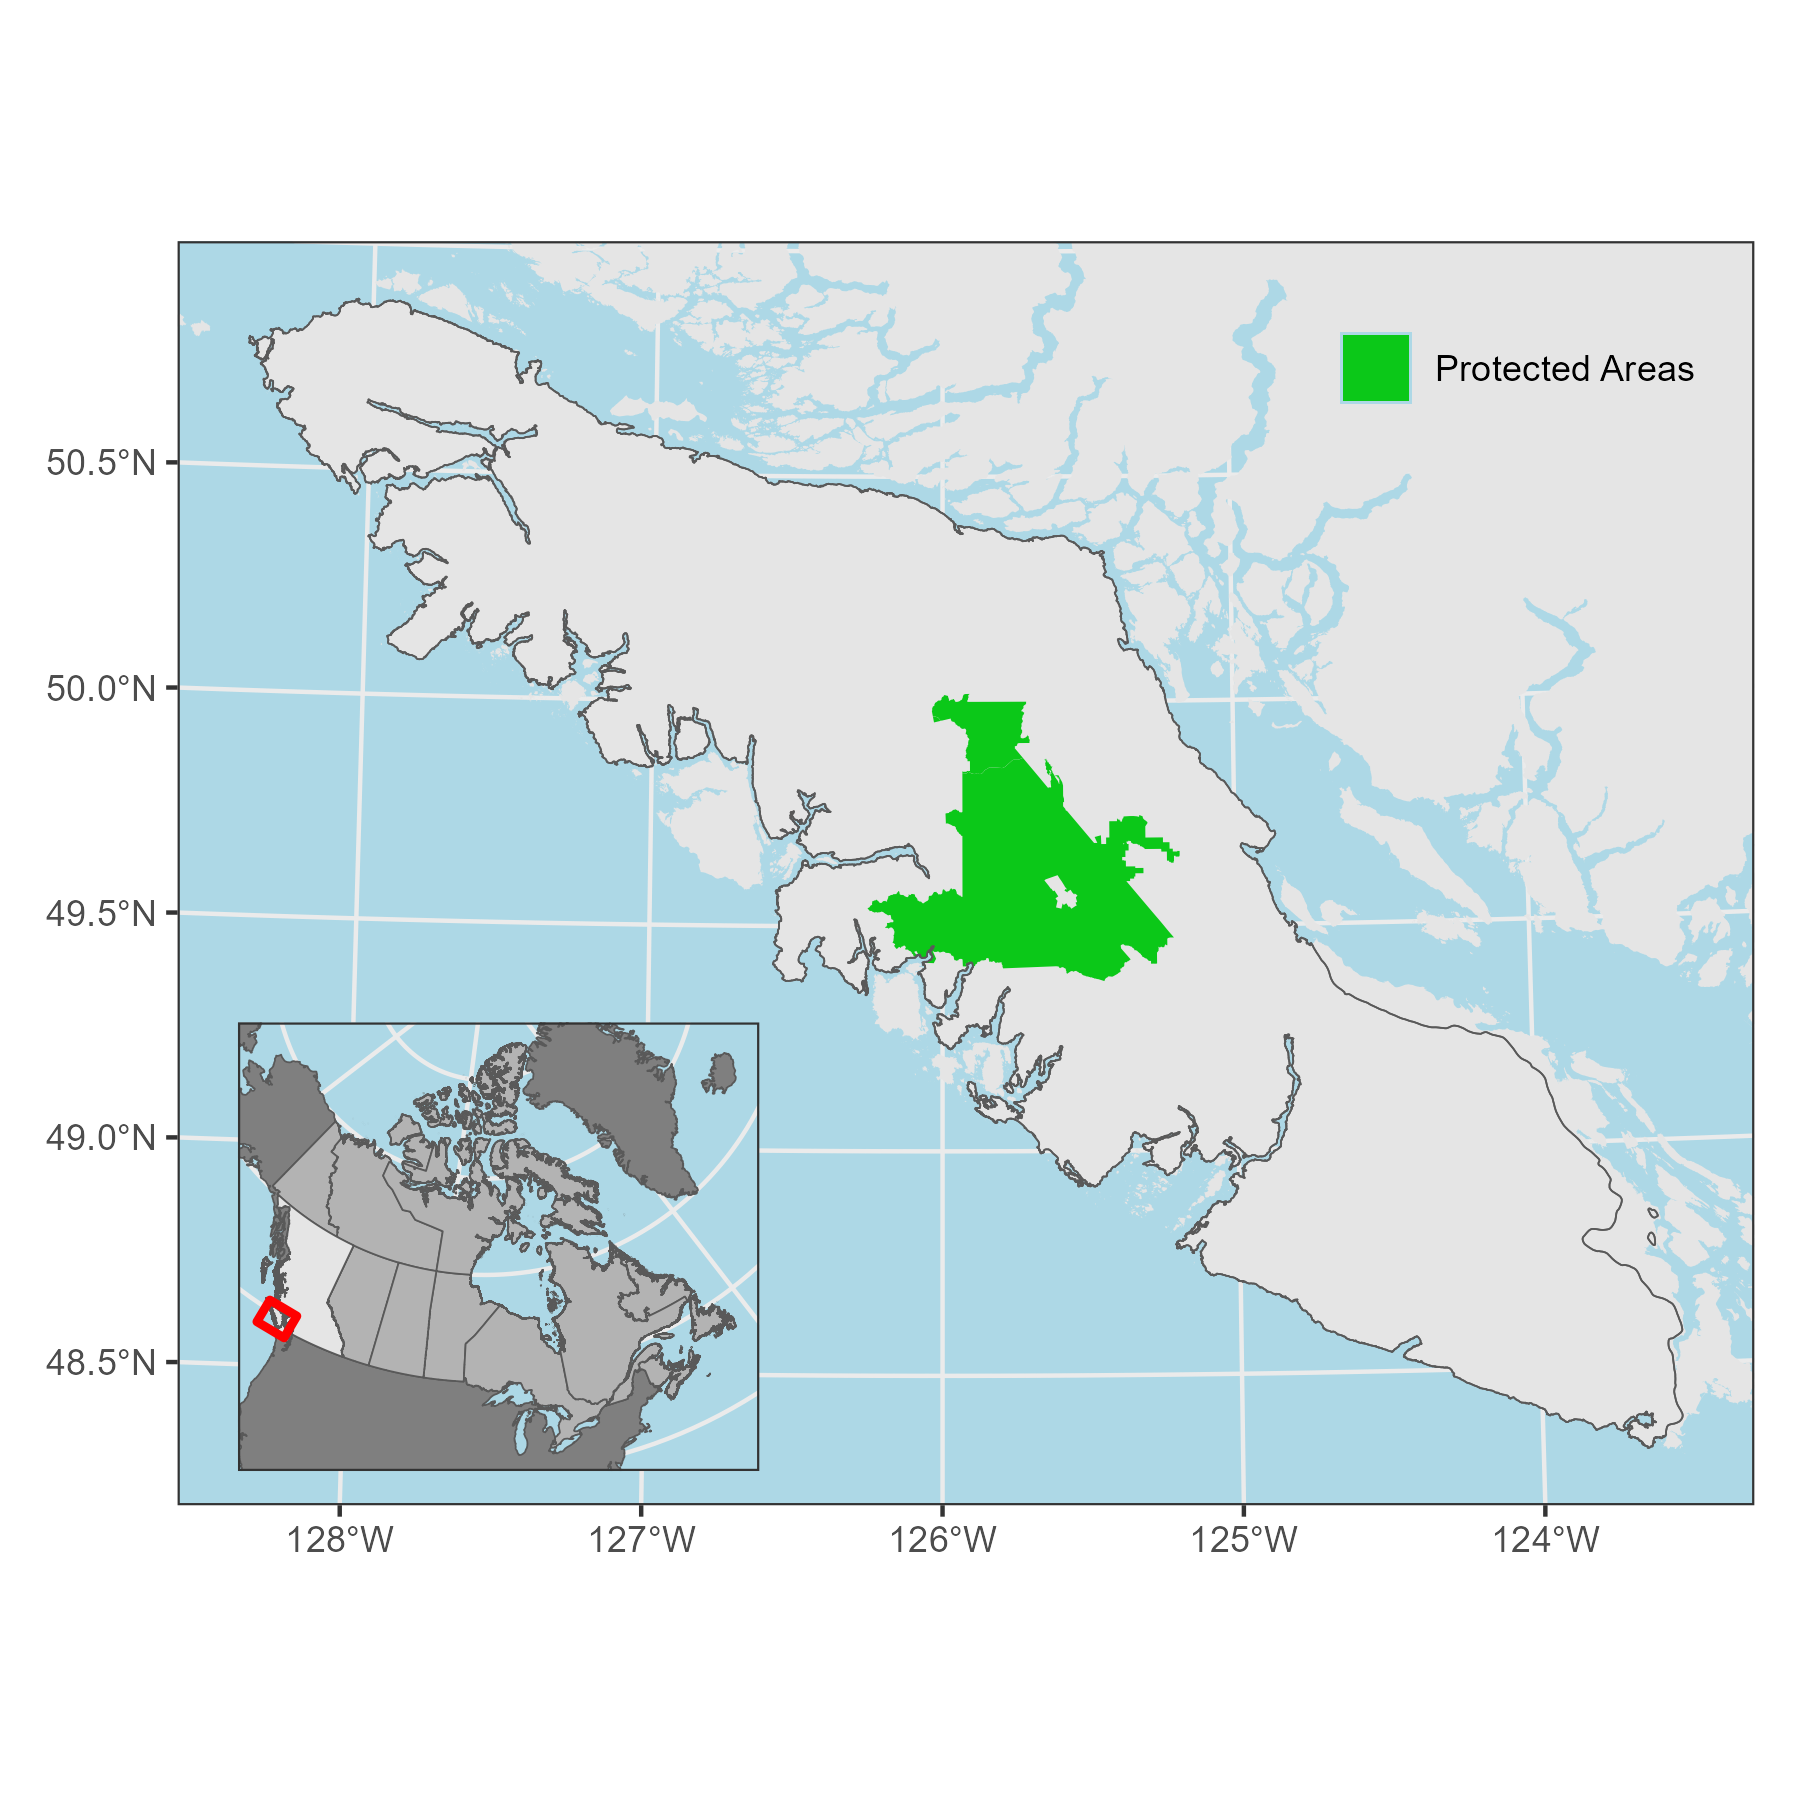

In [ ]:
knitr::include_graphics("E:/Sync/Masters/04_vi_pristine/strathcona/figures/study_area.png")

## Data

### Reference State

We defined our reference state as the forested area of Strathcona Park. We chose Strathcona Park as a temporal and protected area reference state, as the oldest and largest (2480 km<sup>2</sup>) protected area in British Columbia. Strathcona Park was established in 1911, and 80% of the park is preserved as wilderness area and designated as Nature Conservancy Areas under the *Park Act* \[@parkact\]. The park contains three BEC zones, CWH, MH, and CMA, but does not include CDF, which is only found in the southern portion of the island. Due to this, we do not include CDF in our analysis.

### Forest Structure

Wall-to-wall, 30 m forest structure metrics (canopy height, canopy cover, structural complexity, and aboveground biomass) were generated by @matasci2018 for 2015 across the forested landscape of British Columbia. This data was generated by using a random forest-kNN approach, imputing airborne laser scanning derived forest structural attributes across the entirety of Canada using Landsat-derived best-available-pixel (BAP) composites \[@white2014; @hermosilla2016\] and topographic information \[@matasci2018; @matasci2018a\]. The BAP composites were derived by selecting optical observations from the Landsat archive (including Landsat-5 Thematic Mapper, Landsat-7 Enhanced Thematic Mapper Plus, and Landsat-8 Operational Land Imager imagery) over the course of the growing season, considering atmospheric effects (haze, clouds, cloud shadows) and distance from the desired composite date (in this case, August 31st). Details on the pixel scoring method can be found in @white2014. The BAP composites were further refined by using a spectral trend analysis on the normalized burn ratio to remove noise, and missing pixels are infilled using temporally-interpolated values. This procedure results in gap-free, surface-reflectance image composites \[@hermosilla2015\], which are used as the primary dataset to impute forest structural attributes \[@matasci2018; @matasci2018a\].

### Forest Function

For our forest ecosystem function dataset, we calculated the Dynamic Habitat Indices \[@radeloff2019\] using Landsat data on Google Earth Engine \[@gorelick2017\], following the methodology of @razenkova. Briefly, we created a synthetic year of NDVI composites using all available Landsat imagery from 2011-2020 (centred on 2015). We used the Landsat QA band derived from the fmask algorithm \[@zhu2012\] to filter out erroneous pixels, such as clouds and cloud shadows. Monthly NDVI values were calculated by taking the median of each month’s NDVI observations, ignoring the year the image was acquired. This allows us to generate the DHIs at spatial resolution of 30 m, while accounting for the lower temporal resolution of the Landsat series when compared to the more commonly used MODIS satellites \[@razenkova\]. The DHIs are calculated as the sum (Cumulative DHI), minimum (Minimum DHI), and coefficient of variation (Variation DHI) of these monthly observations. The three DHIs have been shown to be indicative of biodiversity overa range of scales \[@radeloff2019; @razenkova2022\] and extents \[@WOS:000265076300011; @coops2019\] for a variety of clades \[@razenkovaMoose; @suttidateConn\].

### Anthropogenic Pressures

We use the Canadian Human Footprint as developed by @hirsh-pearson2022. The Canadian Human Footprint is an additive pressure map generated by summing the 12 different anthropogenic pressures (built environments, crop land, pasture land, population density, nighttime lights, railways, roads, navigable waterways, dams and associated reservoirs, mining activity, oil and gas, and forestry), which ranges from zero to 55 for any cell across Canada. This cumulative dataset is also distributed with Canada-wide individual pressure values \[@hirsh-pearson\]. Here, we focus on the overall cumulative pressure map and four individual pressures: population density, built environments, roads, and forestry.

### Covariates

In our matching procedure (see @sec-sim) we use two core datasets as our matching covariates. Firstly, we use a 30 m digital elevation model and derived slope dataset from the Advanced Spaceborne Thermal Emission and Reflection Radiometer (ASTER) Version 2 GDEM product \[@tachikawa2011\]. We also match on four climate variables; mean annual precipitation (MAP), mean annual temperature (MAT), mean warmest month temperature (MWMT), and mean coldest month temperature (MCMT) calculated from 1990-2020 climate normals using the ClimateNA software package at a 1 km spatial resolution, and downsampled to 30 m using cubic spline resampling in the **terra** (version 1.7-71) R package \[@R-terra\] in R \[@R-base version 4.4.1\].

## Calculating similarity

We calculate the sigma dissimilarity \[@mahony2017\] of forested pixels across British Columbia by using an expanded coarsened exact matching (CEM) technique \[@iacus2012; @fig-flow\]. This methodology enables us to evaluate the degree of similarity between all forested pixels in the province and natural forests, while accounting for potential confounding variables such as climate and topography. Briefly, the CEM technique creates comparable groups of observations among covariates by initially coarsening the covariates. In this instance, all six covariates were coarsened into five quintiles hereafter referred to as bins. CEM then performs exact matching on the bins, with each pixel matched to a climatically and topographically similar group of pixels within Strathcona Park, hereafter referred to as strata. In the case where there is not enough matched pixels found in Strathcona Park, we calculate the nearest neighbours in bin space for all strata, and sample up to 1000 pixels while minimizing the nearest neighbour distance. If the nearest neighbour distance is on average above 2, we do not consider that strata in our analysis.

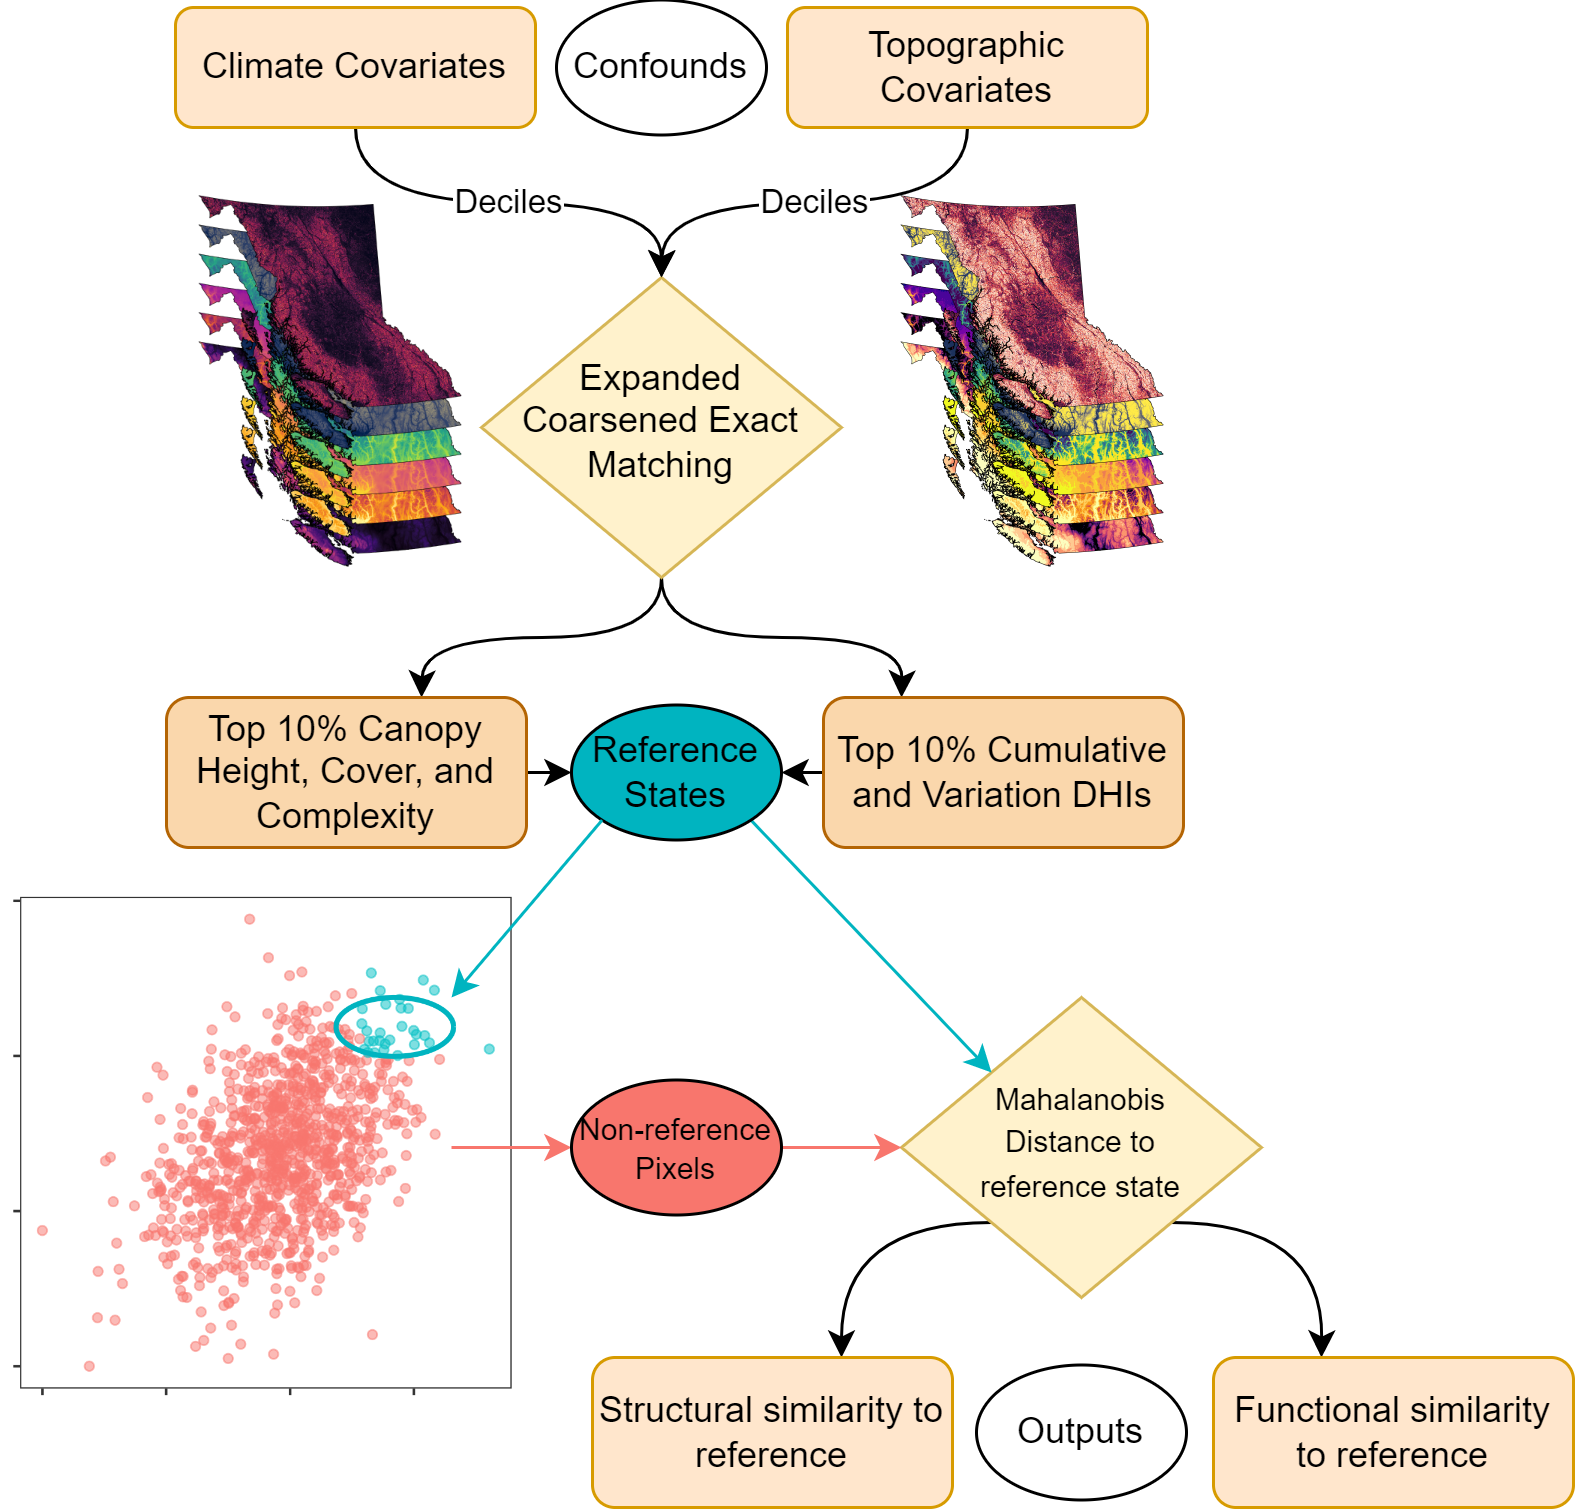

In [ ]:
knitr::include_graphics("E:/Sync/Masters/04_vi_pristine/figures/flow.drawio.png")

Following the matching procedure, we identify data driven reference states in both structural and functional attributes by selecting the top 10% of protected observations for each structural (canopy height, cover, and structural complexity) and functional (cumulative and variation DHIs) attribute, separately. We then determine the similarity of all pixels, in both structural and functional attributes, to the reference states by calculating the sigma dissimilarity metric. Sigma dissimilarity standardizes the Mahalanobian distance \[@mahalanobis1936generalized\] by rescaling it into percentiles of the chi distribution \[@mahony2017\]. This effectively accounts for the effect of dimensionality when creating a multivariate similarity metric \[@mahony2017\]. We calculate sigma dissimilarity for every strata with a suitable reference state, for each of the 6

## Sampling

We reclassify the Canadian Human Footprint \[@hirsh-pearson; @hirsh-pearson2022\] into categorical data following @hirsh-pearson2022 and @arias-patino2024 : a value of zero has no anthropogenic pressure, zero to four has low anthropogenic pressure, four to eight has medium anthropogenic pressure, and \> eight has high anthropogenic pressure. To assess the cumulative impact of anthropogenic pressure on ecological similarity, we implement stratified sampling on all suitable strata, sampling 100 samples from each anthropogenic pressure class. For our individual pressures, we follow the same reclassification steps on each pressure layer, and sample an additional hundred samples for each pressure class. Sampling was performed using the **sgsR** (version 1.4.5) R package \[@goodbody2023\] with the Quiennec method \[@queinnec2021\].

## Analysis

We used a one-way analysis of variance (ANOVA) with a critical value of 0.05 to identify differences in the mean similarity values across cumulative anthropogenic pressure classes. We account for family-wise error rate for our ANOVAs using the Holm-Bonferroni method, only continuing the analysis for similarity variables with significant ANOVAs at the adjusted critical value. As ANOVAs only identify if there is a difference in means, but does not identify which means are different, we used a Tukey HSD post-hoc test to identify which means are different from the control group (no anthropogenic pressure), which also controls for the family-wise error rate.

We follow the same protocol to identify the difference in means for each anthropogenic pressure of interest (roads, population density, forestry, and built environment). We compare each pressure to the same ‘no pressure’ values sampled in the cumulative pressure analysis. All statistical analysis were conducted using the **rstatix** (version 0.7.2) R package \[@R-rstatix\].

# Results

We found that similarity to high structural complexity (Anova: p = 0.007) and high canopy height (Anova: p = 0.003) reference states was influenced by medium to high levels of cumulative anthropogenic pressure (@fig-boxplot-overall). Similarity to high biomass (Anova: p = 0.142) and canopy cover (Anova: p = 0.855) regions were not significantly influenced by cumulative anthropogenic pressures. Productivity metrics were also not influenced by cumulative anthropogenic pressures.

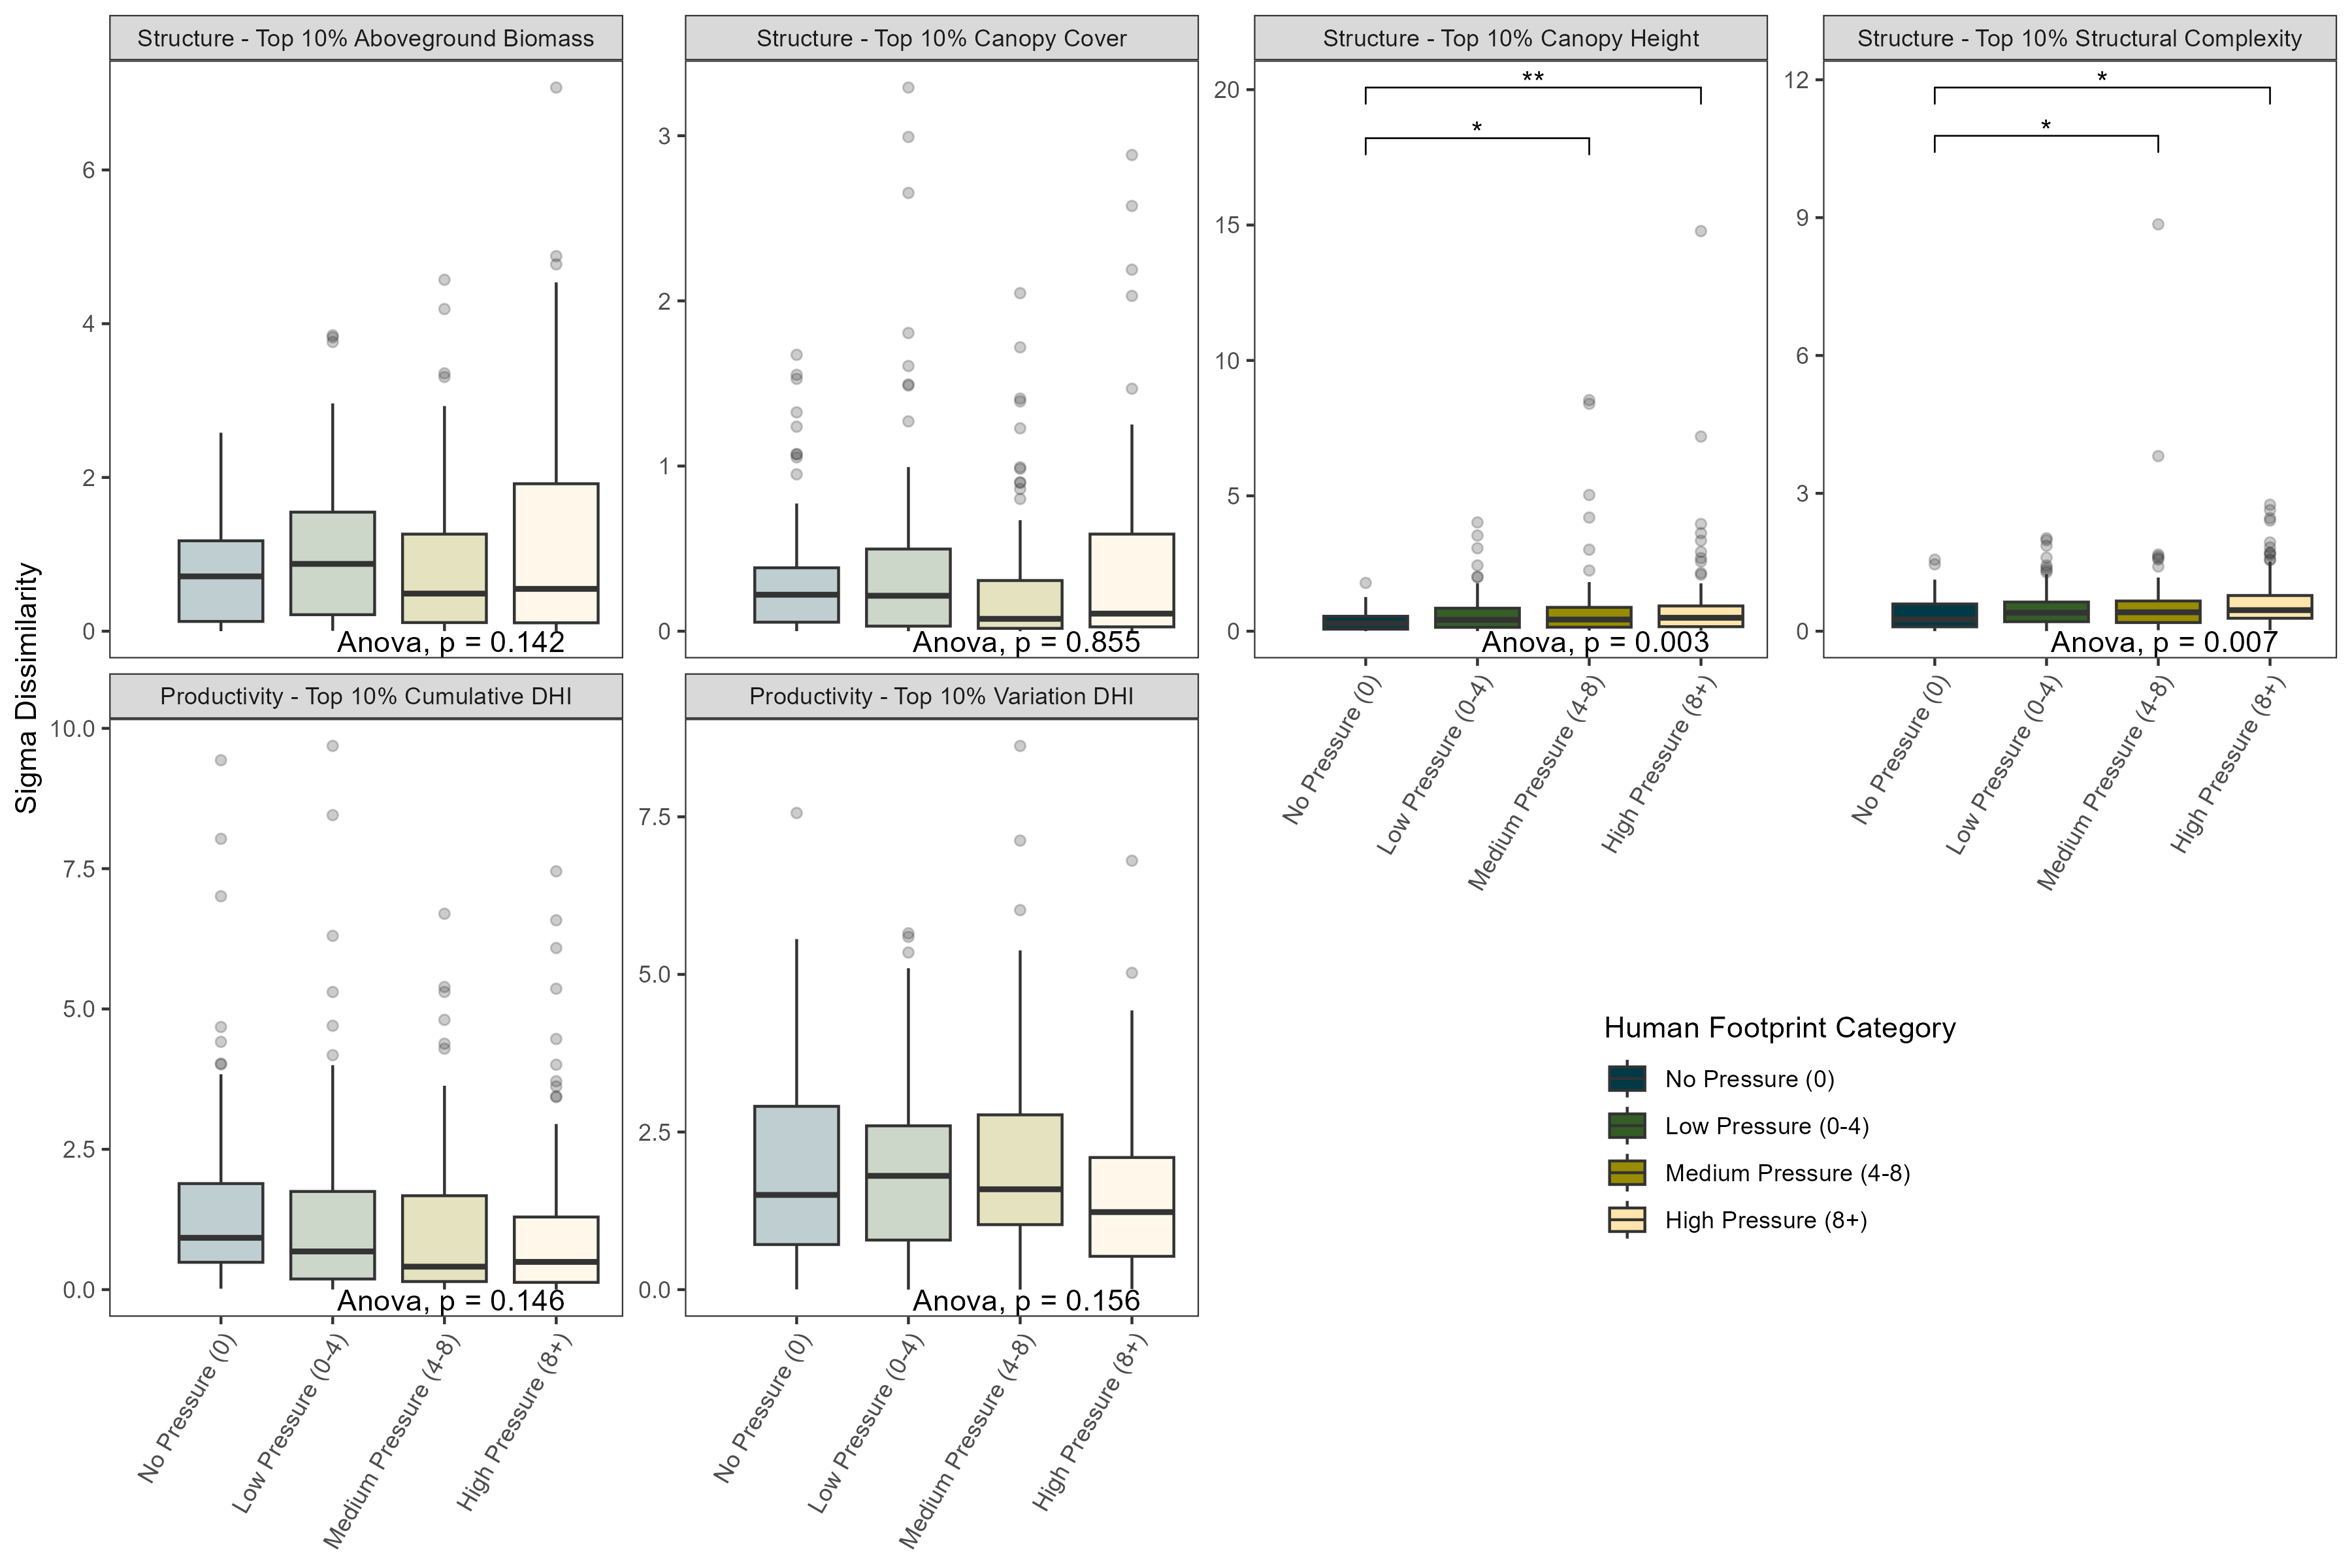

In [ ]:
knitr::include_graphics("E:/Sync/Masters/04_vi_pristine/strathcona/figures/mahal_boxplot_sig.png")

Increases in all individual anthropogenic pressures led to increased dissimilarity when compared to most structural reference states (@fig-boxplot-individual). Increases in pressures from roads and built environment did not increase or reduce similarity to structural reference states with high canopy cover. Medium and high pressures from population density and forestry/harvesting increased dissimilarity to all structural reference states. Anthropogenic pressures generally did not influence the similarity to reference states based on productivity metrics, however, increases in pressures from population density decreased dissimilarity to ecosystems with high variation in energy availability.

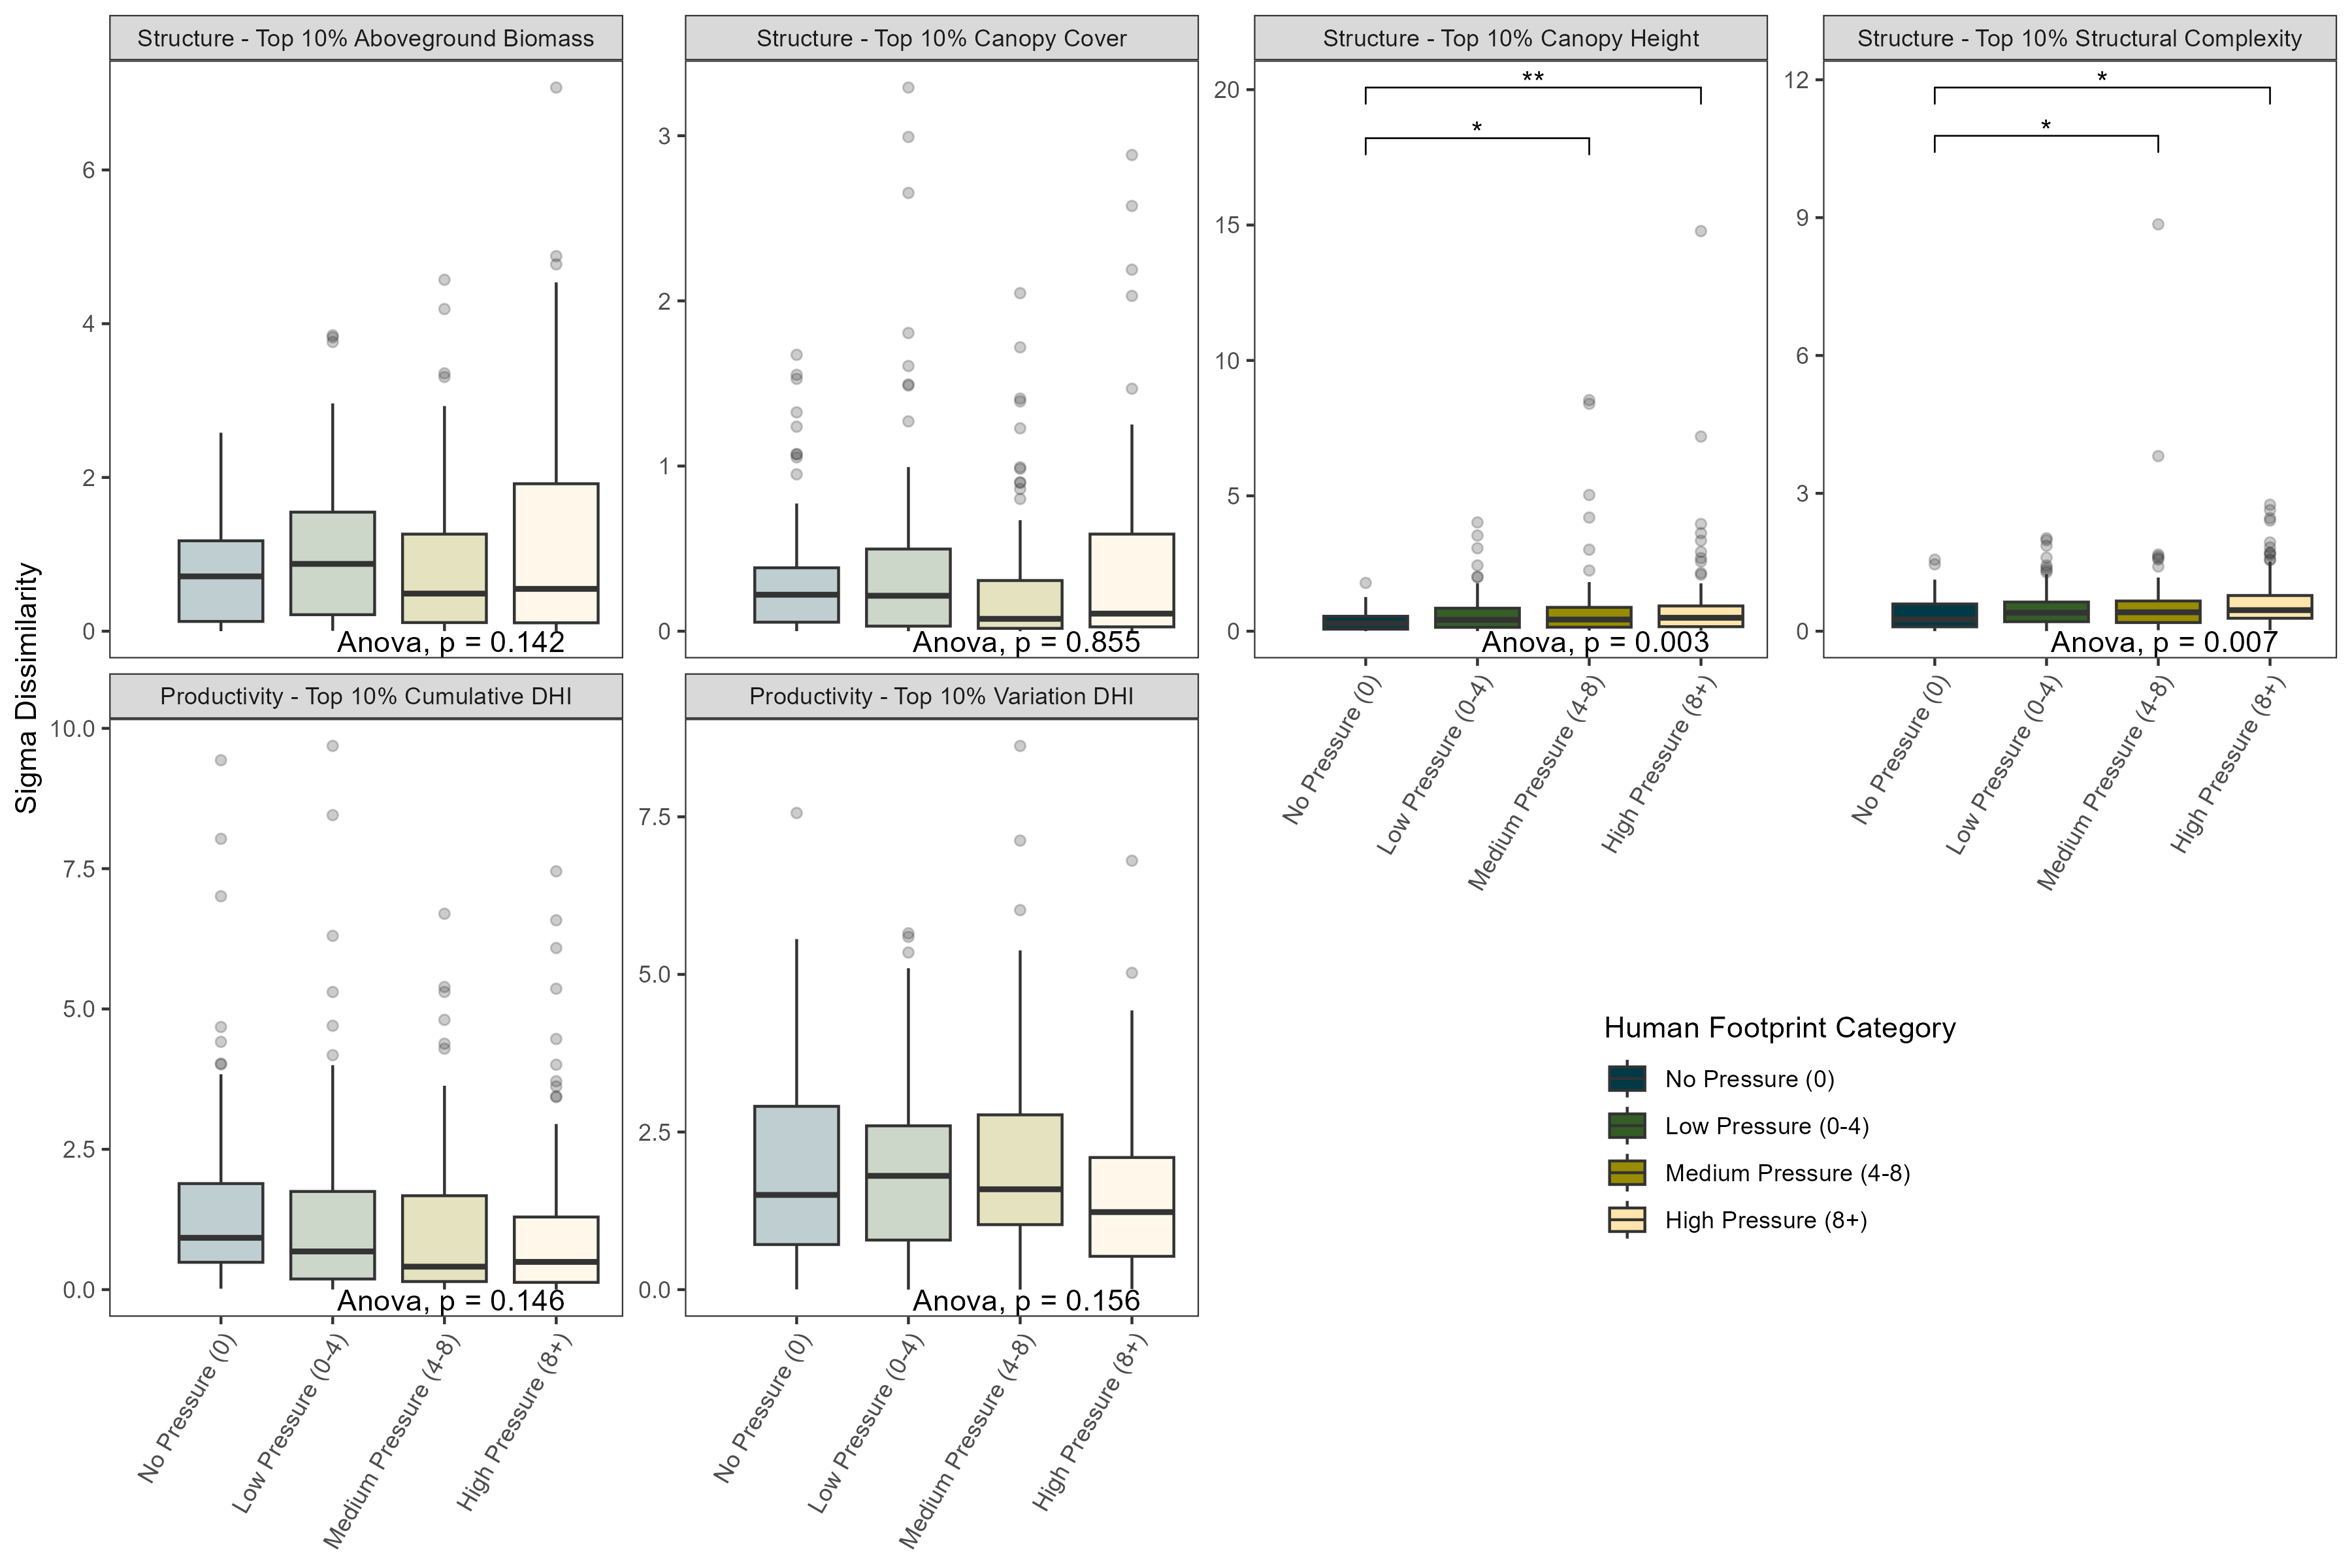

In [ ]:
knitr::include_graphics("E:/Sync/Masters/04_vi_pristine/strathcona/figures/mahal_boxplot_sig.png")

# Discussion

In this paper, we use medium-resolution remote sensing metrics of ecosystem structure and function to assess similarity to high-integrity forests across Vancouver Island, British Columbia. We validate our approach by assessing the influence of the human footprint on these reference states, finding that ecosystem structure in the form of forest structural attributes is influenced by increased anthropogenic pressures on a cumulative and individual level (@fig-boxplot-overall; @fig-boxplot-individual). Forest ecosystem function, as represented by the DHIs, is generally not significantly influenced by anthropogenic pressures, although population density increased similarity to ecosystems with high variation in energy availability (@fig-boxplot-individual).

We find that similarity to high structural complexity forests, which are often high in biodiversity due to increased niche availability \[@walter2021; @macarthur1961\], is impacted by medium to high levels of anthropogenic pressures. Structural similarity to tall forests is also impacted by medium to high levelsof anthropogenic pressure, while productivity metrics were not influenced by cumulative anthropogenic pressures in this region \[@fig-boxplot-overall\]. In tropical forests, @bourgoin2024 found that anthropogenic forest degradation influenced aboveground biomass and canopy height, however, they focus on edge effects, fire, and selective logging, rather than cumulative and individual anthropogenic pressures. @li2023 also found a global impact of anthropogenic pressures on forest structural density, however, they do not explore which facets of anthropogenic pressure are the strongest driver of forest degradation. @hansen2020 integrate forest structure and anthropogenic pressure into the forest structural integrity index to identify forest stands of high ecological value (high structural quality; low anthropogenic footprint). We further this research by assessing individual pressures on a multivariate metric of structural similarity to a high-quality reference state \[@fig-boxplot-individual\].

Anthropogenic effects on forest function are rarely examined. Here, we also examine how anthropogenic pressures influence similarity to high available energy and high energy variation forests, both hypothesized to indicate high levels of biodiversity in a number of guilds and clades \[@radeloff2019; @razenkova2022\]. We do not find a strong influence of cumulative anthropogenic pressure on our forest functioning metrics, however, we did find that dissimilarity to forest stands with high annual energy variability was reduced under high anthropogenic pressure (@fig-boxplot-individual).

Assessing individual pressure influences on the environment is also relevant to questions of how cumulative anthropogenic pressure maps are calculate. There is currently a debate between additive and antagonistic anthropogenic pressure mapping methods, as there is little information on mechanistic interactions between pressures \[@arias-patino2024\]. We assess individual pressures on structural and functional similarity in forests across Vancouver Island, Canada, an advancement upon the current standard of using a single value of cumulative anthropogenic pressure \[@li2023; @bourgoin2024\]. Similar methods could be used to examine mechanistic pressure interactions across large scales.

We apply the Sigma Dissimilarity metric developed by @mahony2017 to determine similarity to high-integrity ecosystems, and use a matching approach to account for environmental covariates. This method accounts for the multidimesnionality of the structure and function datasets, and standardizes them so they are comparable. This is especially relevant in our case as we use four forest structural attributes and two forest function metrics. These methods are similar to other similarity metrics commonly applied in remote sensing for multivariate similarity such as spectral similarity \[@schweiger2018\], and phenospectral similarity \[@oseidarko2024\].

While we are limited in number of structural variables due to the imputation of the lidar-derived dataset across the study area \[@matasci2018; @matasci2018a\], future studies could directly use raw lidar datasets to create a multitude of metrics, and apply the sigma similarity method to those. This could capture additional facets of similarity which are missed when using a Canada-wide dataset with limited forest structural attributes at 30 m. New spaceborne lidar missions such as GEDI \[@dubayah2020\] and IceSAT-II \[@neumann2019\] are also providing estimates of forest structure across the globe. However, these satellites are sample based missions, and do not provide wall-to-wall coverage \[@duncanson2021\].

We assess multiple definitions of high quality forest across a large region using a data-driven approach. Often, it is common for reference states to be unavailable due to a lack of data on regions of high ecological integrity, especially across large regions \[@mcnellie2020\]. We attempt to circumvent this by using a large, long-established protected area (Strathcona Provincial Park; @fig-study), and a matching technique that preserves ecological similarity between reference states and their counterparts. The long-established, large protected area ensures that little anthropogenic pressures or modification have been made to the landscape, while also guaranteeing that the reference state is attainable for a given topography and climate \[@hobbs2014; @corlett2016\] due to contemporary nature of the reference state. Our matching technique (coarsened exact matching, combined with an kNN approach when no exact match is available) allows us to generate reference states in a near wall-to-wall fashion, which esnures similarity between reference state and compared pixels.

Our techniques move beyond traditional impact evaluation techniques \[@ferraro2009\] commonly used in protected area effectiveness assessments by allowing spatial reconstruction of conservation outcomes, and generating a multivariate, rather than univariate, assessment of similarity to high ecological integrity forests. While our methods in this paper use a data-driven approach to derive reference states, if an individual or organization is interested in a specific species or ecosystem, and has known locations of high quality ecosystems associated with that species or ecosystem, these methods can be applied to assess similarity to those high quality ecosystems across large regions.

Could also be a paragraph about urban forestry and canopy cover. Since urban foreters want to preserve high amounts of cover and greenspace that could be why the roads/built environments dont see strong differences to the reference state. This issue is also compounded by the canopy cover on the island just being consistently high across the board. I’m fine not discussing this, but could be something interesting to note

# References